# Event data

One of the main benefits of working with kloppy is that it loads metadata with the event data. This metadata includes teams (name, ground and provider id) and players (name, jersey number, optional position and provider id). Using this metadata, it becomes very easy to create an analysis that is usable by humans, because it includes names instead of only numbers.

This section shows how metadata is organized and some use-cases.

## Loading statsbomb data

The datasets module of kloppy makes it trivial to load statsbomb data. Keep in mind that by using the data you accept the license of the open-data project.


In [28]:
from kloppy import statsbomb

dataset = statsbomb.load_open_data(event_types=["pass", "shot"])

## Exploring metadata

kloppy always loads the metadata for you and makes it available at the `metadata` property. 

In [29]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

After loading the data, the metadata can be used to iterate over teams and players. By default `metadata.teams` contain `[HomeTeam, AwayTeam]`. `Team` and `Player` entities have the `__str__` magic method implemented to help you cast it to a string. When you want to 

In [30]:
print(f"{home_team.ground} - {home_team}")
print(f"{away_team.ground} - {away_team}")

home - Barcelona
away - Deportivo Alavés


In [31]:
[f"{player} ({player.jersey_no})" for player in home_team.players]


['Malcom Filipe Silva de Oliveira (14)',
 'Philippe Coutinho Correia (7)',
 'Sergio Busquets i Burgos (5)',
 'Jordi Alba Ramos (18)',
 'Gerard Piqué Bernabéu (3)',
 'Luis Alberto Suárez Díaz (9)',
 'Ivan Rakitić (4)',
 'Ousmane Dembélé (11)',
 'Samuel Yves Umtiti (23)',
 'Lionel Andrés Messi Cuccittini (10)',
 'Nélson Cabral Semedo (2)',
 'Sergi Roberto Carnicer (20)',
 'Clément Lenglet (15)',
 'Rafael Alcântara do Nascimento (12)',
 'Arturo Erasmo Vidal Pardo (22)',
 'Jasper Cillessen (13)',
 'Arthur Henrique Ramos de Oliveira Melo (8)',
 'Marc-André ter Stegen (1)']

In [32]:
# get provider id for team
f"statsbomb team id: {home_team.team_id} - {away_team.team_id}"

'statsbomb team id: 217 - 206'

In [33]:
# same for the players
[f"{player} id={player.player_id}" for player in metadata.teams[0].players]


['Malcom Filipe Silva de Oliveira id=3109',
 'Philippe Coutinho Correia id=3501',
 'Sergio Busquets i Burgos id=5203',
 'Jordi Alba Ramos id=5211',
 'Gerard Piqué Bernabéu id=5213',
 'Luis Alberto Suárez Díaz id=5246',
 'Ivan Rakitić id=5470',
 'Ousmane Dembélé id=5477',
 'Samuel Yves Umtiti id=5492',
 'Lionel Andrés Messi Cuccittini id=5503',
 'Nélson Cabral Semedo id=6374',
 'Sergi Roberto Carnicer id=6379',
 'Clément Lenglet id=6826',
 'Rafael Alcântara do Nascimento id=6998',
 'Arturo Erasmo Vidal Pardo id=8206',
 'Jasper Cillessen id=8652',
 'Arthur Henrique Ramos de Oliveira Melo id=11392',
 'Marc-André ter Stegen id=20055']

In [34]:
# get player from first event
player = dataset.events[0].player
print(player)
print(player.team)
print(f"Teams are comparable? {player.team == away_team}")

Jonathan Rodríguez Menéndez
Deportivo Alavés
Teams are comparable? True


The `Team` and `Player` entities also contain the magic methods to use those keys in dictionaries or use them in sets. This makes it easy to do some calculations, and show the results without mapping the player_id to a name.

In [35]:
from collections import defaultdict

passes_per_player = defaultdict(list)
for event in dataset.events:
    if event.event_name == "pass":
        passes_per_player[event.player].append(event)
        
for player, passes in passes_per_player.items():
    print(f"{player} has {len(passes)} passes")

Jonathan Rodríguez Menéndez has 14 passes
Guillermo Alfonso Maripán Loaysa has 18 passes
Sergio Busquets i Burgos has 79 passes
Ivan Rakitić has 138 passes
Ousmane Dembélé has 65 passes
Jordi Alba Ramos has 121 passes
Víctor Laguardia Cisneros has 11 passes
Marc-André ter Stegen has 23 passes
Gerard Piqué Bernabéu has 79 passes
Nélson Cabral Semedo has 31 passes
Sergi Roberto Carnicer has 85 passes
Samuel Yves Umtiti has 63 passes
Lionel Andrés Messi Cuccittini has 92 passes
Rubén Duarte Sánchez has 25 passes
Ibai Gómez Pérez has 35 passes
Mubarak Wakaso has 23 passes
Manuel Alejandro García Sánchez has 23 passes
Rubén Sobrino Pozuelo has 17 passes
Luis Alberto Suárez Díaz has 38 passes
Fernando Pacheco Flores has 16 passes
Martín Aguirregabiria Padilla has 20 passes
Daniel Alejandro Torres Rojas has 16 passes
Philippe Coutinho Correia has 51 passes
Jorge Franco Alviz has 11 passes
Adrián Marín Gómez has 6 passes
Arthur Henrique Ramos de Oliveira Melo has 18 passes
Borja González Tomás

Now let's filter on home_team.

In [36]:
for player, passes in passes_per_player.items():
    if player.team == home_team:
        print(f"{player} has {len(passes)} passes")

Sergio Busquets i Burgos has 79 passes
Ivan Rakitić has 138 passes
Ousmane Dembélé has 65 passes
Jordi Alba Ramos has 121 passes
Marc-André ter Stegen has 23 passes
Gerard Piqué Bernabéu has 79 passes
Nélson Cabral Semedo has 31 passes
Sergi Roberto Carnicer has 85 passes
Samuel Yves Umtiti has 63 passes
Lionel Andrés Messi Cuccittini has 92 passes
Luis Alberto Suárez Díaz has 38 passes
Philippe Coutinho Correia has 51 passes
Arthur Henrique Ramos de Oliveira Melo has 18 passes
Arturo Erasmo Vidal Pardo has 7 passes


## Use metadata when transforming to pandas dataframe

The metadata can also be used when transforming a dataset to a pandas dataframe. The `additional_columns` argument should be passed to `to_pandas`. 

In [37]:

dataframe = dataset.to_pandas(
    additional_columns={
        'player_name': lambda event: str(event.player),
        'team_name': lambda event: str(event.player.team)
    }
)

dataframe[[
    'event_id', 'event_type', 'result', 'timestamp', 'player_id', 
    'player_name', 'team_name'
]].head()

,event_id,event_type,result,timestamp,player_id,player_name,team_name
0,34208ade-2af4-45c3-970e-655937cad938,PASS,COMPLETE,0.098,6581,Jonathan Rodríguez Menéndez,Deportivo Alavés
1,d1cccb73-c7ef-4b02-8267-ebd7f149904b,PASS,INCOMPLETE,3.497,6855,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés
2,f1cc47d6-4b19-45a6-beb9-33d67fc83f4b,PASS,COMPLETE,6.785,5203,Sergio Busquets i Burgos,Barcelona
3,f774571f-4b65-43a0-9bfc-6384948d1b82,PASS,COMPLETE,8.431,5470,Ivan Rakitić,Barcelona
4,46f0e871-3e72-4817-9a53-af27583ba6c1,PASS,COMPLETE,10.433,5477,Ousmane Dembélé,Barcelona


## Attribute transformers

Attribute transformer make it possible to add predefined attributes to a dataset. The attributes are calculated during export to a pandas DataFrame. Kloppy does provide some Transformers like one to calculate the angle to the goal, and one to calculate the distance to the goal. When you need additional Transformers you can write your one by providing a `Callable` to `to_df`. 

In [38]:
from kloppy import statsbomb

from kloppy.domain.services.transformers.attribute import (
    BodyPartTransformer, AngleToGoalTransformer, DistanceToGoalTransformer
)

dataset = statsbomb.load_open_data(
    event_types=["pass", "shot"], 
    coordinates="statsbomb"
)

dataset.to_df(
    AngleToGoalTransformer(),
    DistanceToGoalTransformer()
)

,angle_to_goal,distance_to_goal
0,90.481466,59.502101
1,82.249964,85.278954
2,69.187354,91.468574
3,77.005383,86.720816
4,66.562013,94.278842
...,...,...
1155,121.578165,63.972650
1156,104.393593,58.330952
1157,39.559668,44.749302
1158,71.095424,38.581083


In [39]:
event = dataset.events[0]

transformer = BodyPartTransformer(encoding="one-hot")
print(transformer(event))


transformer = AngleToGoalTransformer()
transformer(event)

{'is_body_part_right_foot': False, 'is_body_part_left_foot': True, 'is_body_part_head': False, 'is_body_part_both_hands': False, 'is_body_part_chest': False, 'is_body_part_left_hand': False, 'is_body_part_right_hand': False, 'is_body_part_drop_kick': False, 'is_body_part_keeper_arm': False, 'is_body_part_other': False, 'is_body_part_no_touch': False}


{'angle_to_goal': 90.48146580583835}

## Wildcard

When you want to export a set of attributes you can specify a wildcard pattern. This pattern is matched against all default (exported by the `Default` Transformer) attributes.

In [40]:
dataset.to_df(
    'period_id',
    'timestamp',
    '*coordinates*',
)

,period_id,timestamp,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y
0,1,0.098,60.50,40.50,35.5,25.5
1,1,3.497,35.50,28.50,85.5,72.5
2,1,6.785,34.50,7.50,34.5,20.5
3,1,8.431,35.50,20.50,35.5,1.5
4,1,10.433,33.50,2.50,25.5,1.5
...,...,...,...,...,...,...
1155,2,2787.914,65.50,73.50,59.5,60.5
1156,2,2791.395,63.50,54.50,89.5,5.5
1157,2,2795.127,91.50,5.50,90.5,26.5
1158,2,2798.906,83.50,27.50,106.5,44.5


## User-defined Transformers

Transformers are nothing more than a function which accepts a `Event` and returns `Dict` (`Callable[[Event], Dict])`). The Transformers provided by kloppy are actually classes that define a `__call__` method. You can also use a `lambda` function or any other function to transform attributes.

When you use named attributes (specified using a keyword argument) the returned value can be any type (`Callable[[Event], Any]`). 

In [41]:
import random

dataset.to_df(
    # Unnamed transformer must always be defined as a Callable. The function must return a Dictionary
    lambda event: {'period': event.period.id, 'timestamp': event.timestamp},
    
    # Named transformer can be specified as a constant
    some_columns=1234,
    
    # Or as a callable
    other_column=lambda x: random.randint(0, 255)
)

,period,timestamp,some_columns,other_column
0,1,0.098,1234,3
1,1,3.497,1234,243
2,1,6.785,1234,74
3,1,8.431,1234,237
4,1,10.433,1234,165
...,...,...,...,...
1155,2,2787.914,1234,79
1156,2,2791.395,1234,252
1157,2,2795.127,1234,197
1158,2,2798.906,1234,54


## to_records

Under the hood the `to_df` method uses the `to_records` method. 

In [42]:
records = dataset.to_records(
    # Unnamed transformer must always be defined as a Callable. The function must return a Dictionary
    lambda event: {'period': event.period.id, 'timestamp': event.timestamp},
    
    # Named transformer can be specified as a constant
    some_columns=1234,
    
    # Or as a callable
    other_column=lambda x: random.randint(0, 255)
)
records[:10]

[{'period': 1, 'timestamp': 0.098, 'some_columns': 1234, 'other_column': 33},
 {'period': 1, 'timestamp': 3.497, 'some_columns': 1234, 'other_column': 98},
 {'period': 1, 'timestamp': 6.785, 'some_columns': 1234, 'other_column': 64},
 {'period': 1, 'timestamp': 8.431, 'some_columns': 1234, 'other_column': 171},
 {'period': 1, 'timestamp': 10.433, 'some_columns': 1234, 'other_column': 56},
 {'period': 1, 'timestamp': 11.15, 'some_columns': 1234, 'other_column': 179},
 {'period': 1, 'timestamp': 24.687, 'some_columns': 1234, 'other_column': 251},
 {'period': 1, 'timestamp': 30.008, 'some_columns': 1234, 'other_column': 20},
 {'period': 1, 'timestamp': 34.738, 'some_columns': 1234, 'other_column': 218},
 {'period': 1, 'timestamp': 37.467, 'some_columns': 1234, 'other_column': 255}]

## EventFactory

In some cases like to use your own `Event` classes. This can be useful when you need certain data that isn't stored in the regular `Event` classes

In [43]:
from dataclasses import dataclass

from kloppy.domain import EventFactory, create_event, ShotEvent
from kloppy import statsbomb


@dataclass(repr=False)
class StatsBombShotEvent(ShotEvent):
    statsbomb_xg: float = None
    
    
class StatsBombEventFactory(EventFactory):
    def build_shot(self, **kwargs) -> ShotEvent:
        kwargs['statsbomb_xg'] = kwargs['raw_event']['shot']['statsbomb_xg']
        return create_event(StatsBombShotEvent, **kwargs)
       
        
event_factory = StatsBombEventFactory()

dataset = statsbomb.load_open_data(event_factory=event_factory)

dataset.filter("shot").to_df(
    "statsbomb_xg",
    "player",
    timestamp=lambda event: event.period.start_timestamp + event.timestamp,
)

,statsbomb_xg,player,timestamp
0,0.075164,Lionel Andrés Messi Cuccittini,149.094
1,0.062892,Jordi Alba Ramos,339.239
2,0.020535,Lionel Andrés Messi Cuccittini,928.625
3,0.096234,Rubén Sobrino Pozuelo,979.616
4,0.035420,Luis Alberto Suárez Díaz,1095.914
...,...,...,...
23,0.137859,Adrián Marín Gómez,4702.947
24,0.379632,Philippe Coutinho Correia,4896.874
25,0.086874,Philippe Coutinho Correia,4966.846
26,0.262502,Lionel Andrés Messi Cuccittini,5367.906


## Freeze frame

For event data it's very useful to have additional context about the event. This can be a metric like packing or xG, but also the frame of tracking data. This freeze frame contains player coordinates. Some providers retrieve the information from broadcast video feeds and therefore only the coordinates of players visible in the feed are known.
Furthermore the vendor might include only the team of the player, and not a player identifier.

In [44]:
dataset = statsbomb.load_open_data(
    match_id='3788741',
    coordinates="statsbomb"
)

In [45]:
event = dataset.find("shot")

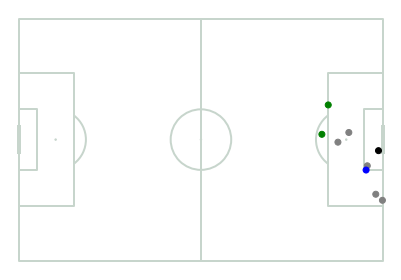

In [47]:
from mplsoccer.pitch import Pitch

home_team = dataset.metadata.teams[0]

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='white', line_color='#c7d5cc', figsize=(16, 11),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

def get_color(player):
    if player == event.player:
        return "blue"
    elif player.team == event.player.team:
        return "green"
    elif player.position.position_id == '1':
        return "black"
    else:
        return "grey"

x, y, color = zip(*[
  (coordinates.x, coordinates.y, get_color(player))
     for player, coordinates in event.freeze_frame.players_coordinates.items()
])

_ = pitch.scatter(x, y, color=color, ax=ax)